In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

import json
import sys   
import os

from datetime import datetime
from dateutil import parser

## Get only id out of the battle data
from operator import itemgetter
## listwise substraction
from operator import sub

import utility
from utility import *
import importlib
importlib.reload(utility);

## Selecting Data File (and Cleaning)



In [2]:
data = list()
load_data(data)
df = pd.DataFrame(data)

2018-10-17_battles.json
2018-10-22_battles.json
2018-11-06_battles.json
2018-11-25_battles.json
2018-12-07_battles.json
2019-01-20_battles.json
2019-04-04_battles.json
select a date from data files (YYYY-mm-dd):2019-04-04
Initiating data loading for 2019-04-04...


HBox(children=(IntProgress(value=0, max=120016), HTML(value='')))

120016 rows in file. 
120016 rows loaded



Only extract pvp matches out

In [3]:
PVP_battles = get_PVP(df)
PVP_battles.head()

,arena,challengeType,deckType,mode,opponent,opponentCrowns,team,teamCrowns,teamSize,tournamentTag,type,utcTime,winCountBefore,winner
0,"{'name': 'Master I', 'arena': 'League 4', 'are...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '8JG0CGRV', 'name': 'Dr.Mohammed !!',...",1,"[{'tag': 'RQUUP89L', 'name': 'billitang 18th',...",2,1,NaN,PvP,1554412809,NaN,1
1,"{'name': 'Master I', 'arena': 'League 4', 'are...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '92J0LVYC', 'name': 'Edwin', 'crownsE...",0,"[{'tag': 'RQUUP89L', 'name': 'billitang 18th',...",1,1,NaN,PvP,1554412523,NaN,1
2,"{'name': 'Master I', 'arena': 'League 4', 'are...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '22CCQLPRY', 'name': 'IGIMMLG', 'crow...",0,"[{'tag': 'RQUUP89L', 'name': 'billitang 18th',...",1,1,NaN,PvP,1554412320,NaN,1
3,"{'name': 'Master I', 'arena': 'League 4', 'are...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': '2QC9LYYG9', 'name': 'Jhonnyy', 'crow...",1,"[{'tag': 'RQUUP89L', 'name': 'billitang 18th',...",0,1,NaN,PvP,1554412118,NaN,-1
4,"{'name': 'Master II', 'arena': 'League 5', 'ar...",None,slotDeck,"{'name': 'Ladder', 'deck': 'Collection', 'card...","[{'tag': 'RJ8RRRQ', 'name': 'baller 3.0', 'cro...",1,"[{'tag': 'RQUUP89L', 'name': 'billitang 18th',...",0,1,NaN,PvP,1554411870,NaN,-1


Load Card dictionary. If new cards added to the game, `update_card` will update the card dictionary and load the updated version.

In [4]:
Cards_df = update_cards(PVP_battles)

Cards data read from latest file is " 2019-04-06 _Cards.csv.csv" has shape:  (91, 11)


In [5]:
Cards_df.set_index("id", inplace = True)
Cards_df.sort_index()

,arena,description,elixir,icon,key,maxLevel,minLevel,name,rarity,type
id,,,,,,,,,,
26000000,0,A tough melee fighter. The Barbarian's handsom...,3,https://api-assets.clashroyale.com/cards/300/j...,knight,13,1,Knight,Common,Troop
26000001,0,A pair of lightly armored ranged attackers. Th...,3,https://api-assets.clashroyale.com/cards/300/W...,archers,13,1,Archers,Common,Troop
26000002,1,"Three fast, unarmored melee attackers. Small, ...",2,https://api-assets.clashroyale.com/cards/300/X...,goblins,13,1,Goblins,Common,Troop
26000003,0,"Slow but durable, only attacks buildings. A re...",5,https://api-assets.clashroyale.com/cards/300/A...,giant,13,3,Giant,Rare,Troop
26000004,4,"A heavily armored, slow melee fighter. Swings ...",7,https://api-assets.clashroyale.com/cards/300/M...,pekka,13,6,P.E.K.K.A,Epic,Troop
26000005,0,"Three fast, unarmored flying attackers. Roses ...",3,https://api-assets.clashroyale.com/cards/300/y...,minions,13,1,Minions,Common,Troop
26000006,6,"As pretty as they are, you won't want a parade...",5,https://api-assets.clashroyale.com/cards/300/q...,balloon,13,6,Balloon,Epic,Troop
26000007,2,"Summons Skeletons, shoots destructo beams, has...",5,https://api-assets.clashroyale.com/cards/300/c...,witch,13,6,Witch,Epic,Troop
26000008,3,A horde of melee attackers with mean mustaches...,5,https://api-assets.clashroyale.com/cards/300/T...,barbarians,13,1,Barbarians,Common,Troop


Prepare for dummy variables. Marked 1 for card appearence in game.  
Here I only keep the winner's deck in order to find "good" card combination.  
Also, Since I am only looking at the winner's deck, I can not draw wining rate solution but only wining counts in this seciont of the analysis.

In [6]:
team_deck, opponent_deck = pd.DataFrame(), pd.DataFrame()

In [7]:
team_deck, opponent_deck = get_deck(PVP_battles, team_deck, opponent_deck)
battle_deck_df = pd.concat([team_deck, opponent_deck, PVP_battles["winner"].reset_index()], axis = 1)

In [8]:
teamDeck_dummy =pd.DataFrame(np.zeros((len(team_deck), len(Cards_df.index)), dtype=np.int), columns=sorted(Cards_df.index))
opponentDeck_dummy = pd.DataFrame(np.zeros((len(opponent_deck), len(Cards_df.index)), dtype=np.int), columns=sorted(Cards_df.index))

In [9]:
with tqdm(total=len(team_deck), initial=0) as pbar:
    for idx, lst in enumerate(team_deck.values):
        for item in lst:
            teamDeck_dummy.at[idx,item]= 1
        pbar.update()

HBox(children=(IntProgress(value=0, max=57400), HTML(value='')))

In [10]:
with tqdm(total=len(opponent_deck), initial=0) as pbar:
    for idx, lst in enumerate(opponent_deck.values):
        for item in lst:
            opponentDeck_dummy.at[idx,item]= 1
        pbar.update()

HBox(children=(IntProgress(value=0, max=57400), HTML(value='')))

In [11]:
#turn card id to card names
teamDeck_dummy.columns = cardIdToData(teamDeck_dummy.columns.tolist())
opponentDeck_dummy.columns = cardIdToData(opponentDeck_dummy.columns.tolist())

Cards data read from latest file is " 2019-04-06 _Cards.csv.csv" has shape:  (91, 11)
Cards data read from latest file is " 2019-04-06 _Cards.csv.csv" has shape:  (91, 11)


In [12]:
winner_deck_list = []
with tqdm(total=len(opponent_deck), initial=0) as pbar:
    for i in range(len(teamDeck_dummy)):
        if battle_deck_df.loc[i,"winner"] >=0:
            winner_deck_list.append(teamDeck_dummy.loc[i,:])
        else:
            winner_deck_list.append(opponentDeck_dummy.loc[i,:])
        pbar.update()

HBox(children=(IntProgress(value=0, max=57400), HTML(value='')))

In [13]:
winner_deck_df = pd.DataFrame(winner_deck_list)
winner_deck_df.head()

,Knight,Archers,Goblins,Giant,P.E.K.K.A,Minions,Balloon,Witch,Barbarians,Golem,...,Lightning,Zap,Poison,Graveyard,The Log,Tornado,Clone,Barbarian Barrel,Heal,Giant Snowball
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


top 5 columns of dummy variables for winner's deck.

Following is a card appearence counts for evry single cards of winner's deck.

In [14]:
winner_deck_df.sum().sort_values()

Goblin Giant           69
Zappies               122
Cannon Cart           179
Heal                  200
Electro Dragon        204
Royal Recruits        268
Bomb Tower            312
Three Musketeers      531
Skeleton Barrel       667
Barbarian Hut         681
Royal Hogs            813
Graveyard             824
Mortar                864
Rascals               886
Bowler                960
Cannon               1032
Wall Breakers        1091
Royal Ghost          1107
Flying Machine       1140
Elixir Collector     1195
Giant Snowball       1196
X-Bow                1270
Goblins              1369
Lava Hound           1495
Ram Rider            1621
Skeletons            1666
Ice Golem            1675
Sparky               1914
Night Witch          1934
Dart Goblin          1941
                    ...  
Inferno Tower        5658
Princess             5666
Archers              5772
Electro Wizard       6046
Giant                6384
Barbarian Barrel     6551
Mega Knight          6552
Lumberjack  

First of all, The card with highest winning counts is Skeleton Army. Probably because of its frequent appearance in the game.  
Another thing draws my attention is that the top winning cards (top 5), are available (unlockable) at lower arena, which makes sense since these cards would appear and available eariler to the players in the eariler stage of the game which means they have higher usage.

Find Card combinations:

In [73]:
winner_deck_df[winner_deck_df["Cannon Cart"] == 1].mean().sort_values(ascending = False).mean()

0.08791208791208799

In [82]:
winner_deck_df.describe()

,Knight,Archers,Goblins,Giant,P.E.K.K.A,Minions,Balloon,Witch,Barbarians,Golem,...,Lightning,Zap,Poison,Graveyard,The Log,Tornado,Clone,Barbarian Barrel,Heal,Giant Snowball
count,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,...,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000,57400.000000
mean,0.119216,0.100557,0.023850,0.111220,0.127613,0.156986,0.141916,0.273449,0.052265,0.073206,...,0.046916,0.300836,0.070610,0.014355,0.181568,0.065139,0.037735,0.114129,0.003484,0.020836
std,0.324045,0.300745,0.152584,0.314407,0.333662,0.363791,0.348967,0.445733,0.222562,0.260476,...,0.211462,0.458626,0.256174,0.118952,0.385491,0.246774,0.190557,0.317971,0.058926,0.142837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
card_pair = dict()
for key in winner_deck_df.columns:
    card_pair[key] = winner_deck_df[winner_deck_df[key] == 1].mean()#.sort_values(ascending = False)

card_pairing_df = pd.DataFrame(card_pair)
card_pairing_df

,Knight,Archers,Goblins,Giant,P.E.K.K.A,Minions,Balloon,Witch,Barbarians,Golem,...,Lightning,Zap,Poison,Graveyard,The Log,Tornado,Clone,Barbarian Barrel,Heal,Giant Snowball
Knight,1.000000,0.330908,0.227173,0.206924,0.058703,0.193763,0.058679,0.065112,0.060333,0.066635,...,0.069068,0.106208,0.109302,0.132282,0.151219,0.156191,0.026777,0.046558,0.050,0.086120
Archers,0.279117,1.000000,0.188459,0.209430,0.062799,0.184774,0.054874,0.057276,0.109333,0.079010,...,0.060156,0.104644,0.075993,0.192961,0.106985,0.054293,0.031394,0.056938,0.050,0.087793
Goblins,0.045448,0.044699,1.000000,0.044330,0.020341,0.042393,0.009207,0.014908,0.019000,0.019039,...,0.015596,0.023338,0.018011,0.019417,0.015736,0.033966,0.002308,0.013738,0.015,0.017559
Giant,0.193044,0.231635,0.206720,1.000000,0.012287,0.209855,0.048736,0.143795,0.121667,0.010947,...,0.050501,0.099317,0.096718,0.167476,0.075609,0.059642,0.015697,0.037552,0.140,0.068562
P.E.K.K.A,0.062838,0.079695,0.108839,0.014098,1.000000,0.100766,0.089860,0.117227,0.072667,0.046644,...,0.144820,0.180855,0.242043,0.155340,0.128766,0.139877,0.069252,0.143337,0.100,0.122074
Minions,0.255151,0.288462,0.279036,0.296209,0.123959,1.000000,0.127793,0.100599,0.154000,0.153736,...,0.137765,0.191510,0.146805,0.149272,0.121954,0.070072,0.111727,0.100901,0.080,0.100334
Balloon,0.069852,0.077443,0.054785,0.062187,0.099932,0.115525,1.000000,0.148254,0.095000,0.064493,...,0.137393,0.106092,0.055514,0.047330,0.080599,0.095748,0.220222,0.137231,0.125,0.182274
Witch,0.149350,0.155752,0.170928,0.353540,0.251195,0.175230,0.285662,1.000000,0.278000,0.289624,...,0.259933,0.171242,0.211202,0.229369,0.144886,0.209147,0.387350,0.289116,0.385,0.138796
Barbarians,0.026450,0.056826,0.041636,0.057174,0.029761,0.051271,0.034986,0.053135,1.000000,0.037363,...,0.046788,0.043896,0.027881,0.055825,0.043370,0.023001,0.064174,0.036330,0.080,0.066054
Golem,0.040918,0.057519,0.058437,0.007206,0.026758,0.071690,0.033268,0.077536,0.052333,1.000000,...,0.167843,0.071404,0.128547,0.061893,0.051813,0.142284,0.173130,0.084262,0.085,0.110368


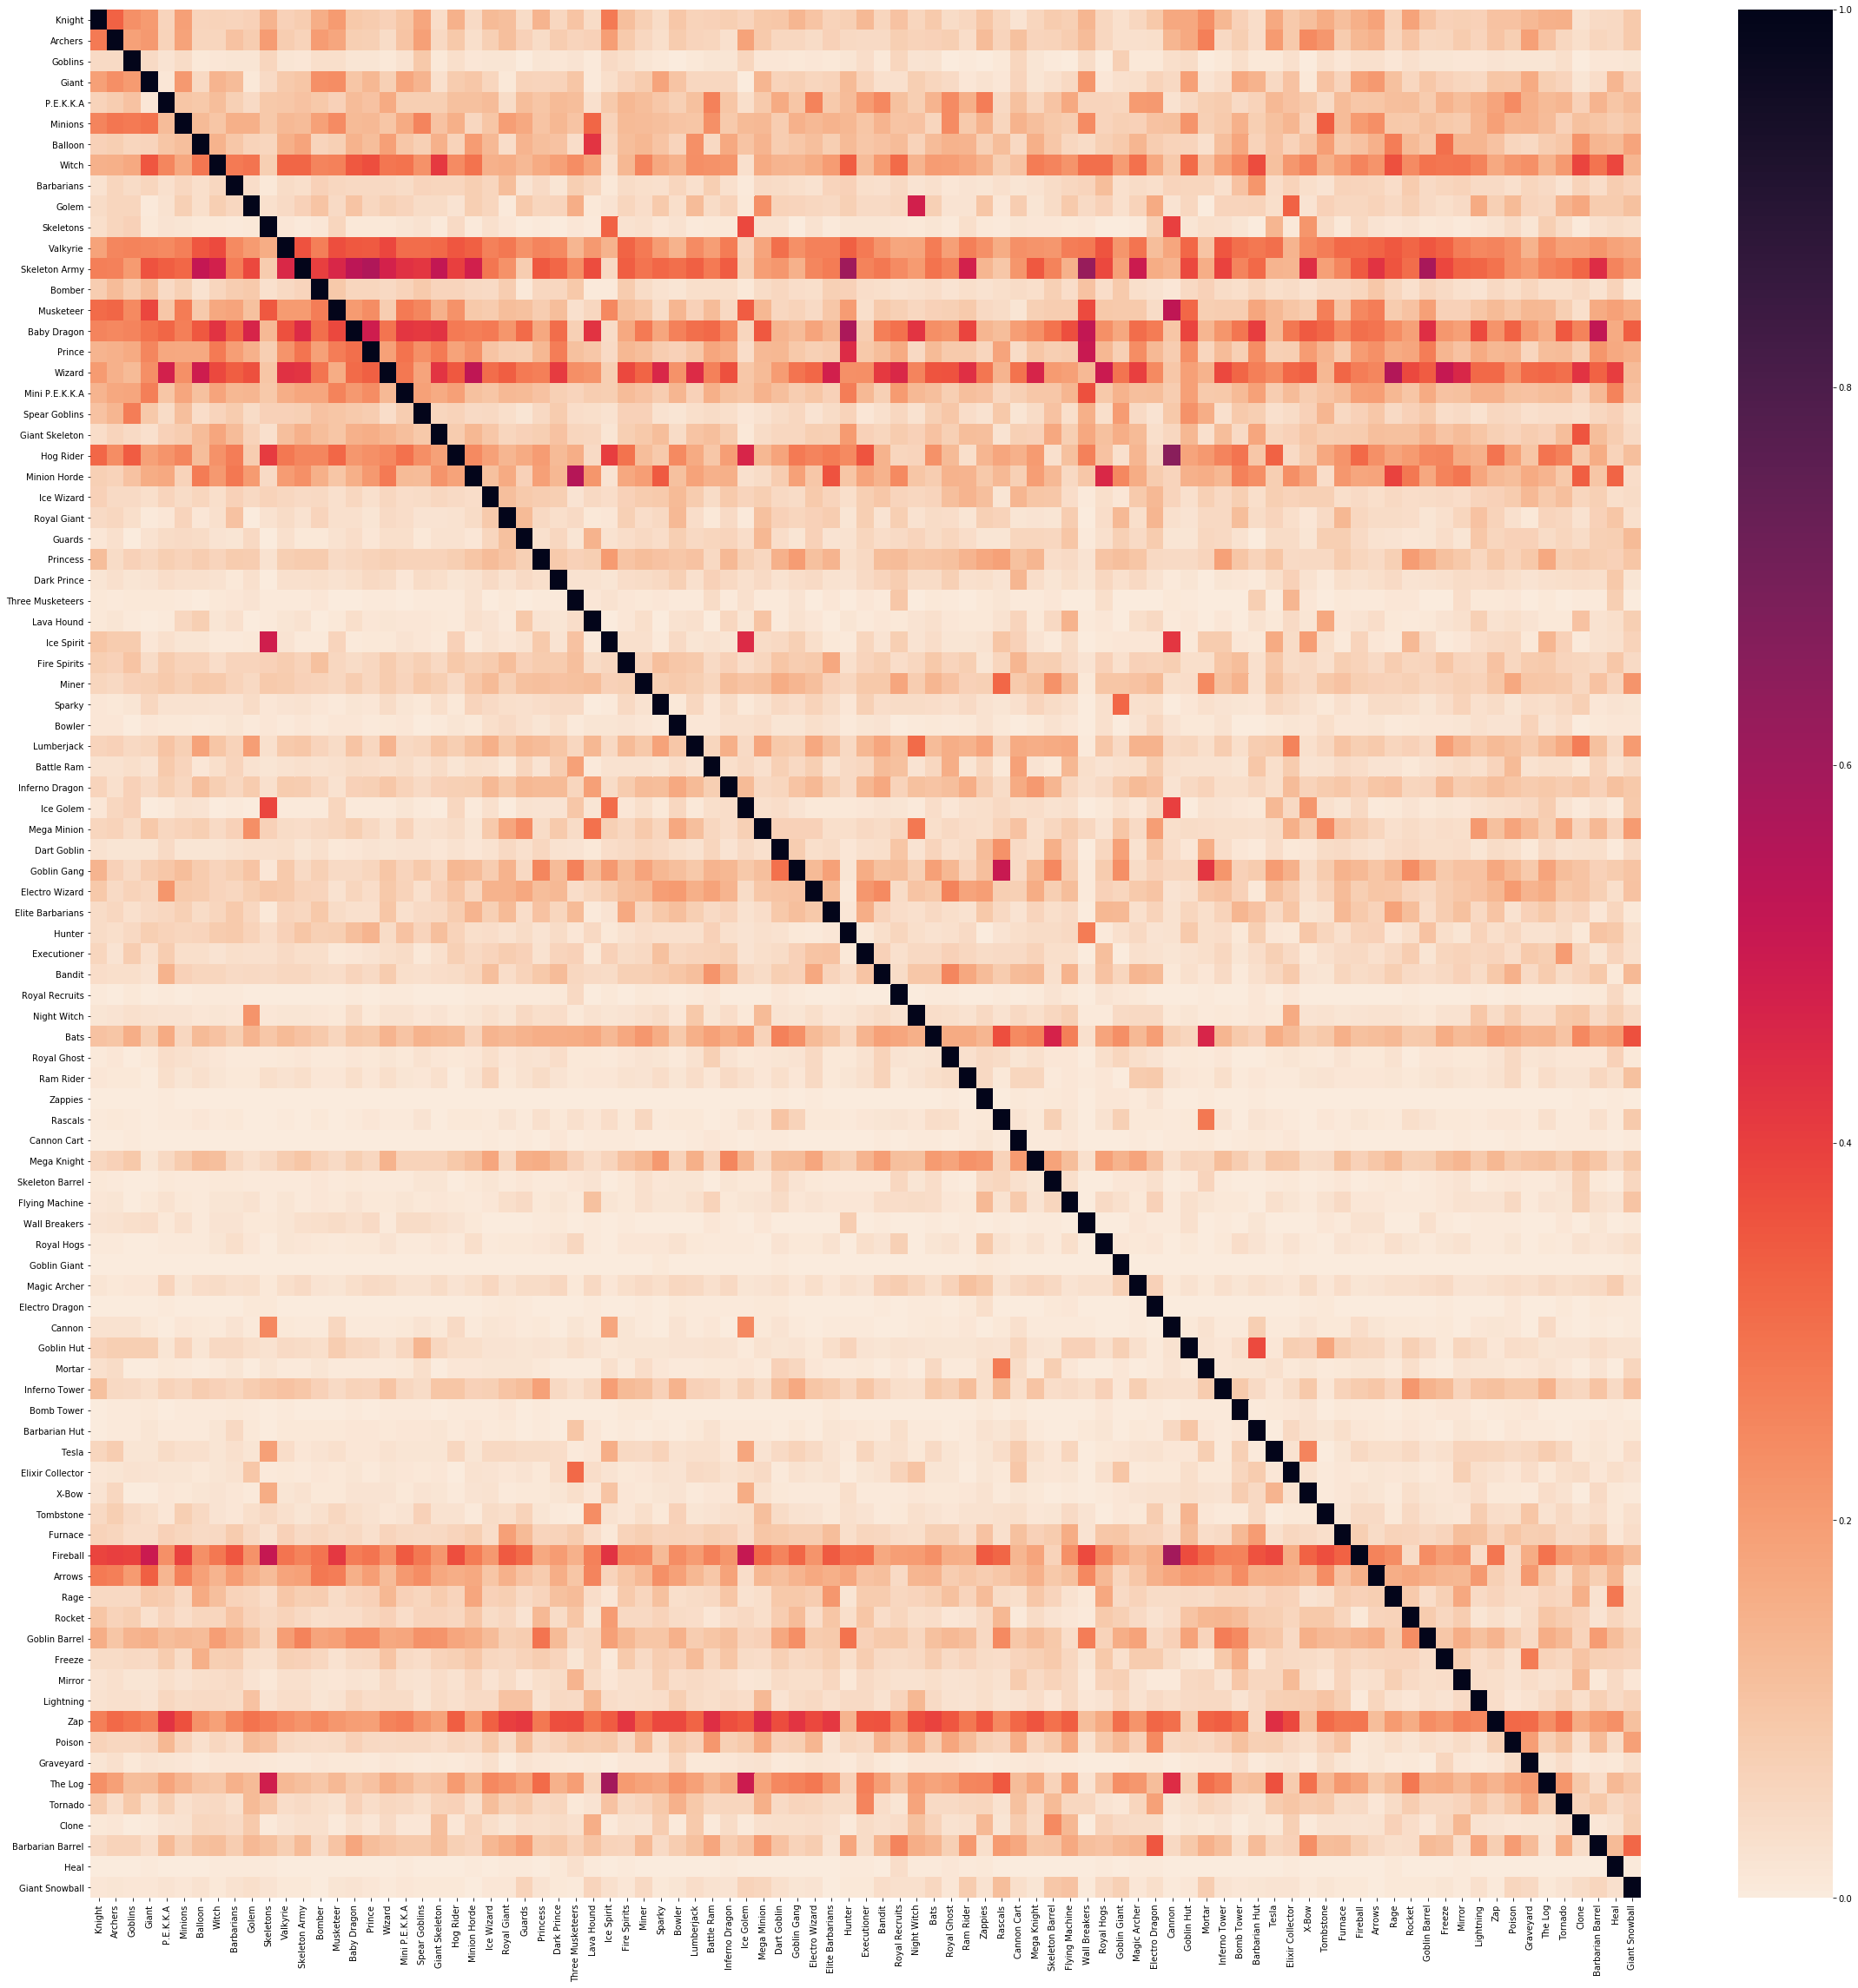

In [52]:
plt.figure(figsize=(40,40))
sns.heatmap(pd.DataFrame(card_pairing_df), cmap = sns.cm.rocket_r);

I was expecting a symmerical heatmap but the above 91 * 91 heatmap is not a symmetrical about it's diagonal axis. The reason is that I took the mean over vertical axis only not the horizontal axis, so each column has different total numbers to be divided by.  
For example, Knight column at index Archers row (iloc[1,0]) says 0.279, but on Archers column at index Knight row (iloc[0,1]) says 0.33. Both makes sense, iloc[1,0] says for Decks that has Knight, 27.9% of those deck had Arches. And latter one says for Decks that has Arches,33% of those deck had Knight.  
Another way of seeing this heatmap is that the vertical axis can add up to 1. So to read data vertically will give insights on card combination to make a good deck. Horizontal axis shows the popularity of the card. For example, Valkyrie, Skeleton Army, Baby Dragon, Wizard, Fire ball and Zap has darker region throughout the horizontal axis. (I was expecting Hog rider to have this feature as well)

Next I plan to define some parameter to show the Compatibility between cards. I can read from the graph above that cannon likes hog rider very well, Rascals likes Goblin gangs etc. 